In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [23]:
df = pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [24]:
df.drop("Id",axis=1, inplace=True)

In [25]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
df.duplicated().sum()

125

In [27]:
df.drop_duplicates(inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

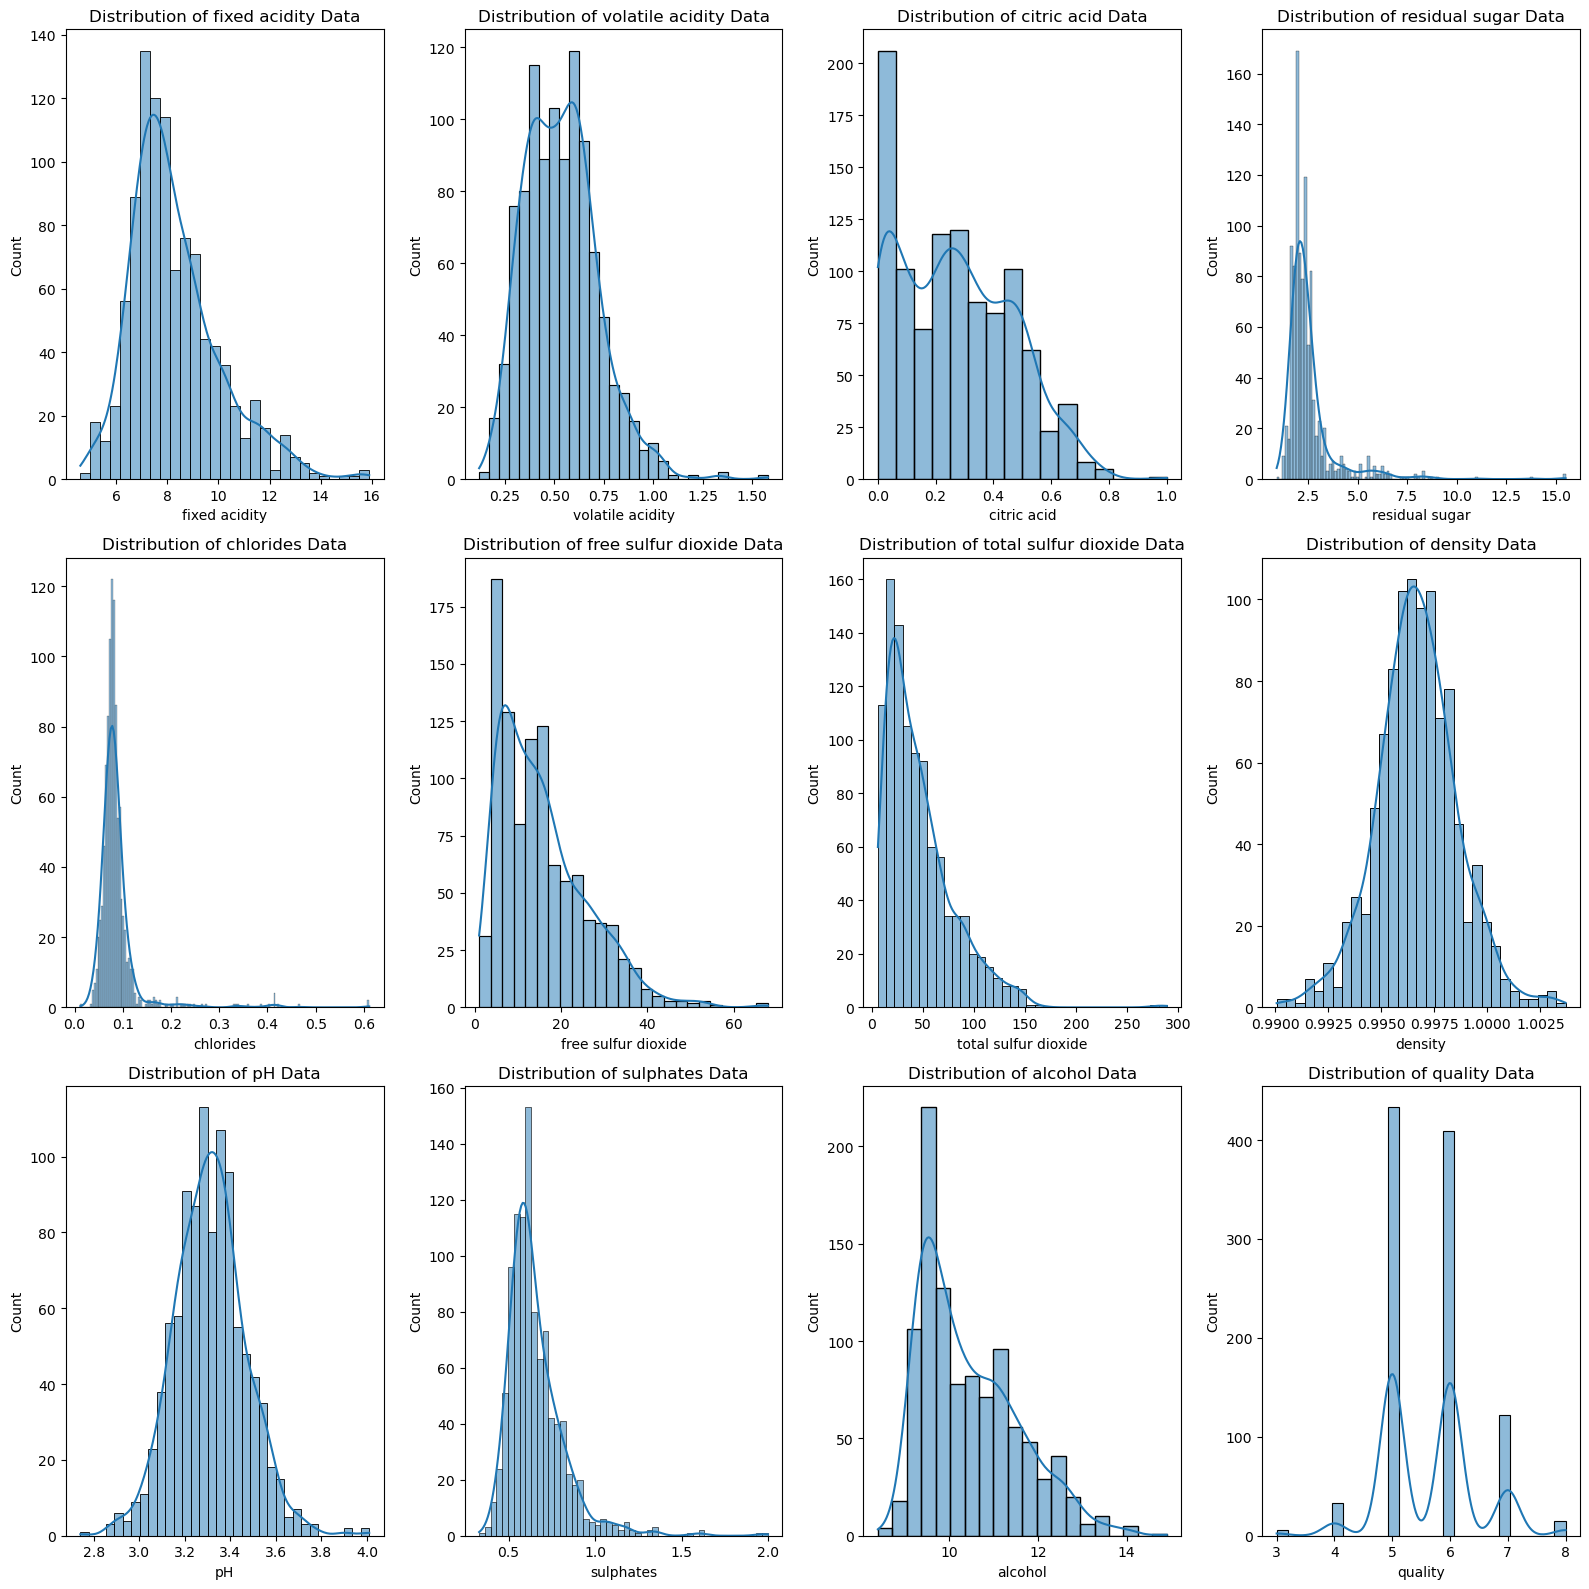

In [28]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

In [29]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up


for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()

In [ ]:
X, y = df.drop("quality", axis=1), df["quality"]
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.5343137254901961
SVC Accuracy: 0.553921568627451
DecisionTreeClassifier Accuracy: 0.47058823529411764
RandomForestClassifier Accuracy: 0.5490196078431373
KNeighborsClassifier Accuracy: 0.5196078431372549
GradientBoostingClassifier Accuracy: 0.5441176470588235
GaussianNB Accuracy: 0.5294117647058824
Epoch 1/50
82/82 [==============================] - 0s 599us/step - loss: -13.8761 - accuracy: 0.0000e+00
Epoch 2/50
82/82 [==============================] - 0s 538us/step - loss: -106.6644 - accuracy: 0.0000e+00
Epoch 3/50
82/82 [==============================] - 0s 539us/step - loss: -455.6090 - accuracy: 0.0000e+00
Epoch 4/50
82/82 [==============================] - 0s 558us/step - loss: -1301.4243 - accuracy: 0.0000e+00
Epoch 5/50
82/82 [==============================] - 0s 552us/step - loss: -2911.8318 - accuracy: 0.0000e+00
Epoch 6/50
82/82 [==============================] - 0s 607us/step - loss: -5557.0303 - accuracy: 0.0000e+00
Epoch 7/50
82/82 [=======

,Model,Accuracy
0,LogisticRegression,0.534314
1,SVC,0.553922
2,DecisionTreeClassifier,0.470588
3,RandomForestClassifier,0.549020
4,KNeighborsClassifier,0.519608
5,GradientBoostingClassifier,0.544118
6,GaussianNB,0.529412
7,Sequential,0.000000


In [ ]:
X, y = df.drop("quality", axis=1), df["quality"]
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.5147058823529411
SVC Accuracy: 0.5196078431372549
DecisionTreeClassifier Accuracy: 0.4803921568627451
RandomForestClassifier Accuracy: 0.5441176470588235
KNeighborsClassifier Accuracy: 0.5049019607843137
GradientBoostingClassifier Accuracy: 0.5392156862745098
GaussianNB Accuracy: 0.5294117647058824
Epoch 1/50
82/82 [==============================] - 0s 542us/step - loss: -15.2073 - accuracy: 0.0000e+00
Epoch 2/50
82/82 [==============================] - 0s 529us/step - loss: -174.5190 - accuracy: 0.0000e+00
Epoch 3/50
82/82 [==============================] - 0s 576us/step - loss: -808.0140 - accuracy: 0.0000e+00
Epoch 4/50
82/82 [==============================] - 0s 853us/step - loss: -2291.8875 - accuracy: 0.0000e+00
Epoch 5/50
82/82 [==============================] - 0s 738us/step - loss: -4968.7080 - accuracy: 0.0000e+00
Epoch 6/50
82/82 [==============================] - 0s 512us/step - loss: -9172.7881 - accuracy: 0.0000e+00
Epoch 7/50
82/82 [=======

,Model,Accuracy
0,LogisticRegression,0.514706
1,SVC,0.519608
2,DecisionTreeClassifier,0.480392
3,RandomForestClassifier,0.544118
4,KNeighborsClassifier,0.504902
5,GradientBoostingClassifier,0.539216
6,GaussianNB,0.529412
7,Sequential,0.000000


In [ ]:
df["quality"] = df["quality"].apply(lambda x :0 if x <=4 else 1 if x <=6 else 2)

In [ ]:
X, y = df.drop("quality", axis=1), df["quality"]
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.9558823529411765
SVC Accuracy: 0.9558823529411765
DecisionTreeClassifier Accuracy: 0.946078431372549
RandomForestClassifier Accuracy: 0.9558823529411765
KNeighborsClassifier Accuracy: 0.9558823529411765
GradientBoostingClassifier Accuracy: 0.9558823529411765
GaussianNB Accuracy: 0.9313725490196079
Epoch 1/50
82/82 [==============================] - 0s 592us/step - loss: 0.2314 - accuracy: 0.9742
Epoch 2/50
82/82 [==============================] - 0s 536us/step - loss: -0.0215 - accuracy: 0.9853
Epoch 3/50
82/82 [==============================] - 0s 596us/step - loss: -0.0385 - accuracy: 0.9853
Epoch 4/50
82/82 [==============================] - 0s 548us/step - loss: -0.0509 - accuracy: 0.9853
Epoch 5/50
82/82 [==============================] - 0s 550us/step - loss: -0.0668 - accuracy: 0.9853
Epoch 6/50
82/82 [==============================] - 0s 552us/step - loss: -0.0893 - accuracy: 0.9853
Epoch 7/50
82/82 [==============================] - 0s 621us/step

,Model,Accuracy
0,LogisticRegression,0.955882
1,SVC,0.955882
2,DecisionTreeClassifier,0.946078
3,RandomForestClassifier,0.955882
4,KNeighborsClassifier,0.955882
5,GradientBoostingClassifier,0.955882
6,GaussianNB,0.931373
7,Sequential,0.955882


In [ ]:
X, y = df.drop("quality", axis=1), df["quality"]
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.9558823529411765
SVC Accuracy: 0.9558823529411765
DecisionTreeClassifier Accuracy: 0.946078431372549
RandomForestClassifier Accuracy: 0.9558823529411765
KNeighborsClassifier Accuracy: 0.9558823529411765
GradientBoostingClassifier Accuracy: 0.9558823529411765
GaussianNB Accuracy: 0.9313725490196079
Epoch 1/50
82/82 [==============================] - 0s 785us/step - loss: 0.4046 - accuracy: 0.8489
Epoch 2/50
82/82 [==============================] - 0s 596us/step - loss: 0.0293 - accuracy: 0.9853
Epoch 3/50
82/82 [==============================] - 0s 575us/step - loss: -0.0292 - accuracy: 0.9853
Epoch 4/50
82/82 [==============================] - 0s 755us/step - loss: -0.0643 - accuracy: 0.9853
Epoch 5/50
82/82 [==============================] - 0s 644us/step - loss: -0.1035 - accuracy: 0.9853
Epoch 6/50
82/82 [==============================] - 0s 702us/step - loss: -0.1593 - accuracy: 0.9853
Epoch 7/50
82/82 [==============================] - 0s 577us/step 

,Model,Accuracy
0,LogisticRegression,0.955882
1,SVC,0.955882
2,DecisionTreeClassifier,0.946078
3,RandomForestClassifier,0.955882
4,KNeighborsClassifier,0.955882
5,GradientBoostingClassifier,0.955882
6,GaussianNB,0.931373
7,Sequential,0.950980
